### A Linear Regression example with NumPy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

#### Data

First, let's create some data to fit. In this example we are going to create a sample of points with some noise that follow the equation: $Y = AX + B$ where A = 2.5 and B = 20. That is the spread that we will try to aproximate with our line:

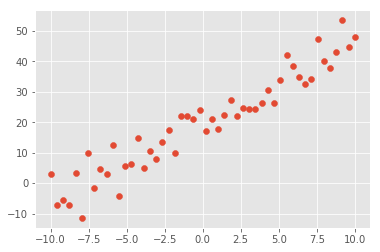

In [2]:
A = 2.5
B = 20
samples = 50 #number of samples
np.random.seed(1)

#equation: Y = AX + B + noise
X = np.linspace(-10,10,samples) #X goes from -10 to +10
Y = A * X + B + np.random.normal(0,5,samples)

#Scatter Plot
plt.scatter(X,Y)
plt.show()

Therefore, we previously know that $\theta_0$ is 20 and $\theta_1$ is 2.5 in our hypothesis function.

#### Initialize parameters

In [3]:
w = 0
b = 0

#### Forward and Backward propagation

Partial differentials of the cost function:

$$\frac{\partial}{\partial\theta_0} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial}{\partial\theta_1} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

In [6]:
def propagate(w,b,X,Y):
    m = X.shape[0]
    
    #Forward propagation (from X to cost)
    cost = np.sum(np.square((w*X+b)-Y))/m
    
    #Backward propagation (to find gradients)
    dw = np.sum(((w*X+b)-Y)*X)/m
    db = np.sum((w*X+b)-Y)/m
    
    grads = {'dw': dw,
             'db': db}
    
    return grads, cost
    
propagate(w,b,X,Y)

({'db': -19.87242575996175, 'dw': -90.262432070145863}, 652.89131568272478)

### Optimization

In [14]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivations from grads
        dw = grads['dw']
        db = grads['db']

        # Update parameters
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
    
    params = {'w': w,
              'b': b}
    grads = {'dw': dw,
             'db': db}
    
    return params, grads, costs

params, grads, costs = optimize(w, b, X, Y, num_iterations =1000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 652.891316
Cost after iteration 100: 76.054234
Cost after iteration 200: 30.232790
Cost after iteration 300: 24.093648
Cost after iteration 400: 23.271127
Cost after iteration 500: 23.160926
Cost after iteration 600: 23.146162
Cost after iteration 700: 23.144183
Cost after iteration 800: 23.143918
Cost after iteration 900: 23.143883


In [26]:
def r_square(Y_fit, Y):
    
    SSE = np.sum(np.square(Y_fit-Y))
    SST = np.sum(np.square(Y.mean()-Y))
    
    return (1 - SSE/SST)

### Results

In [15]:
params

{'b': 19.871567842552626, 'w': 2.6016818655512619}

Parameters after regression are **19.87** for $\theta_1$ and **2.60** for $\theta_2$, close to the real parameters without noise: **20** and **2.5** respectively for $\theta_1$ and $\theta_2$. 

In [27]:
Y_fit = params['w'] * X + params['b']
r_square(Y_fit,Y)

0.91028739942852255

The $R²$ of the regression fitted is **0.91**, what is good enough for the purpose of this exercise.

Plot:

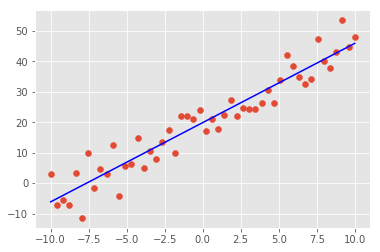

In [19]:
# Data
plt.scatter(X,Y)

# Linear Regression fitted
plt.plot(X, Y_fit, color = 'blue')

plt.show()